# K-Means

## 這是讀info檔案

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 24 23:34:04 2022

@author: User
"""

import pandas as pd
import numpy as np

df = pd.read_excel("spaceInfo_6.1.xlsx")
df = pd.read_csv("Cluster_result.csv")

stations = len(df.index)

## 這是字型

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager
# 如果下載字體失敗, 再重新下載一次就可以了
# fontManager.addfont('/Users/amy/Downloads/TaipeiSansTCBeta-Regular.ttf')
# mpl.rc('font', family='Taipei Sans TC Beta')

X_hat = np.asmatrix(df[["long", "lati"]].to_numpy())
Label = list(df["address"])


for i in range(len(Label)):
    Label[i] = Label[i][:5]

### k-means 主程式(僅供參考，不需執行，之前已經分出一個最好的結果，下面會直接讀取)

In [3]:
# # # In[] K-means
# # k = 6
# # index = np.random.choice(len(X_hat), k, replace=False)
# # centroids = X_hat[index, :]
# # distances = np.empty(shape=(stations,k),dtype='object')
# # for i in range(len(X_hat)):
# #     for j in range(k):
# #         distances[i,j] = float(np.sqrt(np.sum(np.square(X_hat[i, :] - centroids[j]))))
# # cluster = np.array([np.argmin(i) for i in distances])
# # for m in range(2000): 
# #     centroids = []
# #     for index in range(k):
# #         temp_cent = X_hat[cluster==index].mean(axis=0) 
# #         centroids.append(temp_cent)
# #     centroids = np.vstack(centroids)
# #     for i in range(len(X_hat)):
# #         for j in range(k):
# #             distances[i,j] = float(np.sqrt(np.sum(np.square(X_hat[i, :] - centroids[j]))))
# #     cluster = np.array([np.argmin(i) for i in distances])

# import pandas as pd

# df_result = pd.read_csv("Cluster_result_v2.csv")
# df_result = df_result.iloc[:,2:]
# cluster = df_result["Cluster"]
# k = 6

# df_result.head()


# # ## 從 function.py 那邊跑出來的結果

# 讀取之前K-Means分群的結果

In [4]:
import pandas as pd

df_result = pd.read_csv("Cluster_result.csv")
df_result = df_result.iloc[:,2:]
cluster = df_result["Cluster"]
k = 6

df_result.head()

,site_id,space_total,space_occupied,space_vacant,long,lati,address,Cluster
0,0,37,0,37,121.53044,25.01493,汀洲路三段60巷2弄路側(A舍北側),0
1,1,32,0,32,121.52917,25.01466,水源舍區C南側,0
2,2,18,0,18,121.52997,25.01411,思源街16號之1旁,0
3,3,10,1,9,121.52895,25.01391,檔案展示館東北側,0
4,4,30,7,23,121.53009,25.01525,汀洲路三段60巷2弄路側(B舍北側),0


## 從 function.py 那邊跑出來的結果

In [5]:
# # 貼上之後記得在keys之間加逗號

# detail={
# 0 :  {'ID': 0, 'name_list': [0, 1, 2, 3, 4], 'r_a': [0.0, 0.0, 0.0, 0.0, -0.0, 7.0, 0.0], 'r_b': [0.0, -0.0, -0.0, 5.0, 1.9999999999999998, 0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, 7.0, 1.9999999999999998, 0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, 2.0, -0.0, 7.0, 0.0], 'r_x': [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.0222222222222222, 0.0, 0.3, 0.0], 'r_u': [1.0, 6.0, 2.0, 4.0, 5.0, 3.0, 7.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, 0.0, 1.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0], [0.0, 0.0, -0.0, 0.0, 1.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 1.0], [0.0, 0.0, -0.0, 1.0, 0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,1 :  {'ID': 1, 'name_list': [5, 13, 14, 16, 26, 29, 30, 38, 46, 47, 50, 51], 'r_a': [0.0, 0.0, 0.0, 16.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, 13.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 4.0, -0.0, 1.0, 3.0, -0.0, -0.0], 'r_p': [0.0, 13.0, -0.0, -0.0, -0.0, 10.0, -0.0, -0.0, 16.0, 11.0, 12.0, 13.0, -0.0, 0.0], 'r_q': [0.0, 0.0, -0.0, 16.0, -0.0, 13.0, -0.0, -0.0, 12.0, 13.0, 11.0, 10.0, 0.0, 0.0], 'r_x': [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0037037037037037646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_u': [1.0, 12.0, 11.0, 2.0, 9.0, 8.0, 13.0, 10.0, 3.0, 5.0, 4.0, 6.0, 7.0, 14.0], 'r_y': [[0.0, 0.0, 0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0], [0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0, 0.0], [0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 1.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 1.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 1.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,2 :  {'ID': 2, 'name_list': [11, 15, 20, 28, 31, 33, 39, 45, 52], 'r_a': [0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0], 'r_b': [0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 1.0], 'r_p': [0.0, 8.0, 16.0, 16.0, -0.0, -0.0, 7.0, 13.0, 1.0, 7.0, 1.0], 'r_q': [0.0, 7.0, 16.0, 13.0, 7.0, 0.0, 1.0, 1.0, 8.0, 16.0, 0.0], 'r_x': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_u': [1.0, 9.0, 5.0, 6.0, 3.0, 2.0, 10.0, 7.0, 8.0, 4.0, 11.0], 'r_y': [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,3 :  {'ID': 3, 'name_list': [6, 8, 21, 22, 23, 24, 36, 42, 43], 'r_a': [0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 5.0, 0.0, 6.0, 0.0], 'r_b': [0.0, 0.0, 3.0, 6.0, 2.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0], 'r_p': [0.0, 3.0, 6.0, 9.0, 11.0, 4.0, 16.0, 6.0, 3.0, 0.0, 0.0], 'r_q': [0.0, 4.0, 3.0, 3.0, 9.0, 6.0, 16.0, 11.0, -0.0, 6.0, 0.0], 'r_x': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.027272727272727344, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.027272727272727157, 0.0], 'r_u': [1.0, 5.0, 4.0, 9.0, 8.0, 6.0, 3.0, 7.0, 10.0, 2.0, 11.0], 'r_y': [[0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, -0.0, 1.0, -0.0, -0.0, 0.0, -0.0, 0.0], [0.0, 1.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 1.0, 0.0, -0.0], [0.0, 0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 1.0, -0.0, 0.0, 0.0], [0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 1.0], [0.0, -0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,4 :  {'ID': 4, 'name_list': [9, 12, 19, 34, 37, 40, 44, 48, 49], 'r_a': [0.0, 7.0, 5.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, 0.0, -0.0, 7.0, -0.0, -0.0, -0.0, 5.0, -0.0, -0.0, 0.0], 'r_p': [0.0, 5.0, -0.0, 7.0, -0.0, -0.0, -0.0, 12.0, -0.0, -0.0, 0.0], 'r_q': [0.0, 12.0, 5.0, -0.0, -0.0, -0.0, -0.0, 7.0, -0.0, -0.0, 0.0], 'r_x': [1.0, 1.0, 1.0, 1.0, -0.0, 0.0, -0.0, 1.0, -0.0, 0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_u': [1.0, 4.0, 2.0, 6.0, 11.0, 8.0, 9.0, 5.0, 10.0, 3.0, 7.0], 'r_y': [[0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0], [0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0], [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, 1.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,5 :  {'ID': 5, 'name_list': [7, 10, 17, 18, 25, 27, 32, 35, 41], 'r_a': [0.0, 13.0, 0.0, 5.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, 3.0, 3.0, 1.0, 3.0, 3.0, 5.0, -0.0], 'r_p': [0.0, -0.0, 0.0, 5.0, 9.0, 3.0, 10.0, 6.0, 8.0, 13.0, 0.0], 'r_q': [0.0, 13.0, -0.0, 10.0, 6.0, -0.0, 9.0, 3.0, 5.0, 8.0, 0.0], 'r_x': [1.0, 1.0, -0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.14000000000000024, 0.0, 0.03684210526315796, 0.0], 'r_u': [1.0, 3.0, 2.0, 6.0, 8.0, 10.0, 7.0, 9.0, 5.0, 4.0, 11.0], 'r_y': [[0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# }


In [6]:

# detail = {0 :  {'ID': 0, 'name_list': [0, 1, 2, 3, 4], 'r_a': [0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.3, 0.19999999999999993, 0.06666666666666665, 0.0], 'r_u': [1.0, 5.0, 2.0, 3.0, 4.0, 7.0, 6.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,1 :  {'ID': 1, 'name_list': [5, 13, 14, 16, 26, 29, 30, 38, 46, 47, 50, 51], 'r_a': [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0037037037037036535, 0.22307692307692323, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16363636363636364, 0.0, 0.014285714285714068, 0.14999999999999997, 0.0, 0.0], 'r_u': [1.0, 10.0, 11.0, 12.0, 13.0, 14.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 9.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,2 :  {'ID': 2, 'name_list': [11, 15, 20, 28, 31, 33, 39, 45, 52], 'r_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_p': [0.0, 0.0, 0.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_q': [0.0, 0.0, 0.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_x': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.022222222222222088, 0.0, 0.0], 'r_w_L': [0.0, 0.033333333333333326, 0.0, 0.08787878787878844, 0.0, 0.0, 0.3, 0.21071428396179362, 0.0, 0.0, 0.0], 'r_u': [1.0, 5.0, 10.0, 7.0, 6.0, 9.0, 4.0, 8.0, 11.0, 2.0, 3.0], 'r_y': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,3 :  {'ID': 3, 'name_list': [6, 8, 21, 22, 23, 24, 36, 42, 43], 'r_a': [0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000000000009, 0.0, 0.11818181818181828, 0.0], 'r_w_L': [0.0, 0.2565217391304348, 0.3, 0.3, 0.13333333333333328, 0.22592592592592592, 0.0, 0.0, 0.3, 0.0, 0.0], 'r_u': [1.0, 9.0, 10.0, 11.0, 6.0, 5.0, 4.0, 7.0, 3.0, 2.0, 8.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,4 :  {'ID': 4, 'name_list': [9, 12, 19, 34, 37, 40, 44, 48, 49], 'r_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_p': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_q': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_x': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'r_w_H': [0.0, 0.30000000000000004, 0.2500000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.19999999999999993, 0.0, 0.0, 0.0], 'r_u': [1.0, 10.0, 9.0, 7.0, 11.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0], 'r_y': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,5 :  {'ID': 5, 'name_list': [7, 10, 17, 18, 25, 27, 32, 35, 41], 'r_a': [0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.10000000000000009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.01111111111111096, 0.3, 0.0, 0.3, 0.3, 0.09999999999999998, 0.26000000000000006, 0.3, 0.3, 0.0], 'r_u': [1.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 6.0, 3.0, 2.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# }


In [10]:
# # 時間限制20

# detail = { 0 :  {'ID': 0, 'name_list': [0, 1, 2, 3, 4], 'r_a': [0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.3, 0.19999999999999993, 0.06666666666666665, 0.0], 'r_u': [1.0, 5.0, 2.0, 3.0, 4.0, 7.0, 6.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,1 :  {'ID': 1, 'name_list': [5, 13, 14, 16, 26, 29, 30, 38, 46, 47, 50, 51], 'r_a': [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0037037037037036535, 0.22307692307692323, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16363636363636364, 0.0, 0.014285714285714068, 0.14999999999999997, 0.0, 0.0], 'r_u': [1.0, 10.0, 11.0, 12.0, 13.0, 14.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 9.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,2 :  {'ID': 2, 'name_list': [11, 15, 20, 28, 31, 33, 39, 45, 52], 'r_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_p': [0.0, 0.0, 0.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_q': [0.0, 0.0, 0.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_x': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.022222222222222088, 0.0, 0.0], 'r_w_L': [0.0, 0.033333333333333326, 0.0, 0.08787878787878844, 0.0, 0.0, 0.3, 0.21071428396179362, 0.0, 0.0, 0.0], 'r_u': [1.0, 5.0, 10.0, 7.0, 6.0, 9.0, 4.0, 8.0, 11.0, 2.0, 3.0], 'r_y': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,3 :  {'ID': 3, 'name_list': [6, 8, 21, 22, 23, 24, 36, 42, 43], 'r_a': [0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000000000009, 0.0, 0.11818181818181828, 0.0], 'r_w_L': [0.0, 0.2565217391304348, 0.3, 0.3, 0.13333333333333328, 0.22592592592592592, 0.0, 0.0, 0.3, 0.0, 0.0], 'r_u': [1.0, 9.0, 10.0, 11.0, 6.0, 5.0, 4.0, 7.0, 3.0, 2.0, 8.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,4 :  {'ID': 4, 'name_list': [9, 12, 19, 34, 37, 40, 44, 48, 49], 'r_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_p': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_q': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_x': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'r_w_H': [0.0, 0.30000000001185617, 0.2500000000116167, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.30000000001185617, 0.0, 0.0, 0.0, 0.20000000001201929, 0.0, 0.0, 0.0], 'r_u': [1.0, 10.0, 9.0, 7.0, 11.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0], 'r_y': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,5 :  {'ID': 5, 'name_list': [7, 10, 17, 18, 25, 27, 32, 35, 41], 'r_a': [0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'r_p': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_q': [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_x': [1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.10000000000000009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.01111111111111096, 0.3, 0.0, 0.3, 0.3, 0.09999999999999998, 0.26000000000000006, 0.3, 0.3, 0.0], 'r_u': [1.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 6.0, 3.0, 2.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# }

In [12]:
# '''
# # test 1-2
# K = 6
# A = 16
# S_H = 0.7
# S_L = 0.3
# L = 10
# lambda_value = 100
# '''

# detail = {0 :  {'ID': 0, 'name_list': [0, 1, 2, 3, 4], 'r_a': [0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 5.0, 1.9999999999999998, 0.0, -0.0], 'r_p': [0.0, 0.0, 0.0, 7.0, 2.0000000000000018, 0.0, 0.0], 'r_q': [0.0, 0.0, 0.0, 1.9999999999999998, 0.0, 7.0, 0.0], 'r_x': [1.0, -0.0, 0.0, 1.0000000000000002, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.0222222222222222, 0.0, 0.3, 0.0], 'r_u': [1.0, 6.000000000000002, 2.0, 3.9999999999999982, 4.999999999999997, 3.0, 7.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0], [0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0], [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0], [0.0, 0.0, -0.0, 0.0, 0.9999999999999999, -0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.9999999999999999], [0.0, 0.0, -0.0, 1.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,1 :  {'ID': 1, 'name_list': [5, 13, 14, 16, 26, 29, 30, 38, 46, 47, 50, 51], 'r_a': [0.0, 0.0, 10.0, 16.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0], 'r_b': [0.0, 13.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 3.999999999999999, 0.0, 4.0, 2.999999999999999, -0.0, 2.0000000000000018], 'r_p': [0.0, 15.0, 5.0, 0.0, 16.0, -0.0, 16.0, 0.0, 16.0, 0.0, 9.0, 12.0, 16.0, 2.0000000000000018], 'r_q': [0.0, 2.0, 15.0, 16.0, 16.0, 0.0, 16.0, -0.0, 12.0, 0.0, 5.0, 9.0, 16.0, 0.0], 'r_x': [1.0, 0.9999946191171534, 1.0, 1.0, -0.0, 0.0, -0.0, 0.0, 1.0, -0.0, 1.0, 1.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 1.614264853991939e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_u': [1.0, 11.999994081028872, 10.000006457059417, 4.999999999999998, 3.0, 7.0, 10.999992466764013, 4.0, 6.0, 1.9999999999999984, 9.000006457059417, 8.0, 14.000000000000002, 13.000000538088262], 'r_y': [[0.0, 0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0], [0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.9999946191171534], [0.0, 0.9999946191171534, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 5.38088284662841e-06], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 1.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0], [0.0, 0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,2 :  {'ID': 2, 'name_list': [11, 15, 20, 28, 31, 33, 39, 45, 52], 'r_a': [0.0, -0.0, 0.0, -0.0, 10.0, 0.0, 0.0, -0.0, 7.0, 5.000000000000001, 0.0], 'r_b': [0.0, 1.0000000000000009, 0.0, 3.0, -0.0, 0.0, 6.0, 12.0, -0.0, -0.0, -0.0], 'r_p': [0.0, 7.000000000000001, -0.0, 15.0, 0.0, 16.0, 6.0, 12.0, 0.0, 10.0, 0.0], 'r_q': [0.0, 6.0, 0.0, 12.0, 10.0, 16.0, 0.0, 0.0, 7.000000000000001, 15.0, 0.0], 'r_x': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.9999972586773404, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0070398045374864e-07, 0.0, 0.0, 0.0], 'r_u': [1.0, 9.0, 6.0, 5.0, 2.0, 4.0, 10.0, 7.0, 8.0, 3.0, 11.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 2.7413226596495477e-06, 0.0, -0.0, -0.0, 0.0, -0.0, 0.9999972586773404, 0.0], [0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 1.0, -0.0, -0.0], [0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.9999972586773404, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,3 :  {'ID': 3, 'name_list': [6, 8, 21, 22, 23, 24, 36, 42, 43], 'r_a': [0.0, 0.9999999999999998, 0.0, 0.0, 0.0, 2.0, 0.0, 5.0, 0.0, 6.0, 0.0], 'r_b': [0.0, -0.0, 3.0, 6.0, 2.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0], 'r_p': [0.0, 3.0, 6.0, 9.0, 11.0, 4.000000000000002, 16.000000000000004, 6.000000000000002, 3.0, 0.0, 0.0], 'r_q': [0.0, 4.0, 3.0, 3.0, 9.0, 6.000000000000002, 16.000000000000004, 11.000000000000002, 0.0, 6.0, 0.0], 'r_x': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.2999999999999999, 0.027272727272727237, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.02727272727272722, 0.0], 'r_u': [1.0, 4.0, 2.9999999999999987, 9.0, 8.0, 4.999999999999999, 7.0, 5.999999999999998, 10.0, 2.0, 11.0], 'r_y': [[0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0], [0.0, 0.0, 0.0, -0.0, -0.0, 0.9999999999999996, 0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0], [0.0, -0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 1.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0], [0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 1.0], [0.0, -0.0, 1.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,4 :  {'ID': 4, 'name_list': [9, 12, 19, 34, 37, 40, 44, 48, 49], 'r_a': [0.0, 3.000005025220881, 5.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 2.9999978463339088, -0.0, -0.0, -0.0, 5.000000000000001, -0.0, -0.0, -0.0], 'r_p': [0.0, 4.999991385335635, -0.0, 3.0, -0.0, 0.0, 0.0, 7.99999784633391, -0.0, -0.0, 0.0], 'r_q': [0.0, 7.999996410556516, 5.0, 2.1536660911314343e-06, -0.0, -0.0, -0.0, 2.9999978463339088, -0.0, -0.0, 0.0], 'r_x': [1.0, 0.999999282111303, 1.0, 0.999999282111303, -0.0, -0.0, -0.0, 0.999999282111303, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 2.153666090694456e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 2.1536660907518292e-07, 0.0, 0.0, 0.0, 1.4357773938345525e-07, 0.0, 0.0, 0.0], 'r_u': [1.0, 5.0, 2.0, 9.0, 8.0, 11.0, 7.0, 6.0, 4.000000000000005, 3.0, 9.999999999999995], 'r_y': [[0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.999999282111303, -0.0, -0.0, -0.0], [0.0, 0.999999282111303, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 7.178886970438114e-07], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.999999282111303], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.999999282111303, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# ,5 :  {'ID': 5, 'name_list': [7, 10, 17, 18, 25, 27, 32, 35, 41], 'r_a': [0.0, 13.0, 0.0, 5.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, -0.0, 0.0, -0.0, 3.0, 3.0, 1.0, 3.0, 3.0, 5.0, -0.0], 'r_p': [0.0, -0.0, 13.0, 8.0, 9.0, 3.0, 10.0, 6.0, 13.0, 13.0, 0.0], 'r_q': [0.0, 13.0, 13.0, 13.0, 6.0, -0.0, 9.0, 3.0, 10.0, 8.0, 0.0], 'r_x': [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.1399999999999999, 0.0, 0.03684210526315786, 0.0], 'r_u': [1.0, 3.0, 2.0, 5.0, 8.0, 10.0, 7.0, 9.0, 6.0, 4.0, 11.0], 'r_y': [[0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], [0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
# }


In [ ]:
'''
# test 1-3
K = 6
A = 16
S_H = 0.7
S_L = 0.3
L = 10
lambda_value = 500
'''

detail = {0 :  {'ID': 0, 'name_list': [0, 1, 2, 3, 4], 'r_a': [0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 5.0, 1.9999999999999998, 0.0, -0.0], 'r_p': [0.0, 0.0, 0.0, 7.0, 2.0000000000000018, 0.0, 0.0], 'r_q': [0.0, 0.0, 0.0, 1.9999999999999998, 0.0, 7.0, 0.0], 'r_x': [1.0, -0.0, 0.0, 1.0000000000000002, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.0222222222222222, 0.0, 0.3, 0.0], 'r_u': [1.0, 6.000000000000002, 2.0, 3.9999999999999982, 4.999999999999997, 3.0, 7.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0], [0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0], [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0], [0.0, 0.0, -0.0, 0.0, 0.9999999999999999, -0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.9999999999999999], [0.0, 0.0, -0.0, 1.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'objVal': 4252719.864913147}
,1 :  {'ID': 1, 'name_list': [5, 13, 14, 16, 26, 29, 30, 38, 46, 47, 50, 51], 'r_a': [0.0, 0.0, 10.0, 14.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, 16.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 4.0, -0.0, 1.0, 3.0, -0.0, -0.0], 'r_p': [0.0, 16.0, 6.0, -0.0, -0.0, 0.0, -0.0, 16.0, 14.0, -0.0, 7.0, 10.0, -0.0, 0.0], 'r_q': [0.0, -0.0, 16.0, 14.0, -0.0, -0.0, -0.0, 16.0, 10.0, -0.0, 6.0, 7.0, -0.0, 0.0], 'r_x': [1.0, 1.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 1.0, 1.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_u': [1.0, 13.0, 12.0, 3.0, 2.0, 5.0, 8.0, 9.0, 4.0, 11.0, 7.0, 6.0, 10.0, 14.0], 'r_y': [[0.0, 0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'objVal': 253.41416894819255}
,2 :  {'ID': 2, 'name_list': [11, 15, 20, 28, 31, 33, 39, 45, 52], 'r_a': [0.0, -0.0, 0.0, -0.0, 9.0, 0.0, 0.0, -0.0, 7.0, 6.0, 0.0], 'r_b': [0.0, 1.0, -0.0, 3.0, -0.0, -0.0, 6.0, 12.0, -0.0, -0.0, -0.0], 'r_p': [0.0, 7.0, 0.0, 15.0, 0.0, 0.0, 6.0, 12.0, 0.0, 9.0, 0.0], 'r_q': [0.0, 6.0, 0.0, 12.0, 9.0, -0.0, 0.0, 0.0, 7.0, 15.0, 0.0], 'r_x': [1.0, 1.0, 0.0, 1.0, 0.9999979448609054, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 2.055139094609935e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_u': [1.0, 9.0, 7.0, 3.9999979448609055, 2.0, 8.0, 10.0, 4.9999979448609055, 5.9999979448609055, 2.9999979448609055, 11.0], 'r_y': [[0.0, -0.0, -0.0, -0.0, 0.9999979448609054, -0.0, -0.0, -0.0, -0.0, 2.055139094570002e-06, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 1.0, 0.0, 0.0, 0.0], [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.9999979448609054, 0.0], [0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 1.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 1.0, -0.0, 0.0], [0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'objVal': 252.44120804436497}
,3 :  {'ID': 3, 'name_list': [6, 8, 21, 22, 23, 24, 36, 42, 43], 'r_a': [0.0, 1.0, 0.0, 0.0, -0.0, 2.0, 0.0, 5.0, 0.0, 5.999999999999999, 0.0], 'r_b': [0.0, 0.0, 3.0, 6.0, 1.9999999999999991, 0.0, -0.0, 0.0, 3.0, 0.0, 0.0], 'r_p': [0.0, 3.0, 6.0, 9.0, 11.0, 4.0, 5.999999999999999, 6.0, 3.0, -0.0, 0.0], 'r_q': [0.0, 4.0, 3.0, 3.0, 9.0, 6.0, 5.999999999999999, 11.0, 0.0, 5.999999999999999, 0.0], 'r_x': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.29999999999999993, 0.02727272727272724, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0272727272727272, 0.0], 'r_u': [1.0, 4.999999999999999, 3.999999999999999, 8.999999999999996, 7.999999999999997, 5.999999999999997, 2.999999999999999, 6.999999999999997, 9.999999999999998, 1.9999999999999991, 11.000000000000012], 'r_y': [[0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 1.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0], [0.0, -0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 1.0, -0.0, -0.0, 0.0], [0.0, -0.0, 1.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0], [0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 1.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'objVal': 2142401.0106242574}
,4 :  {'ID': 4, 'name_list': [9, 12, 19, 34, 37, 40, 44, 48, 49], 'r_a': [0.0, 3.0, 12.999993710469436, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0], 'r_b': [0.0, 0.0, 0.0, 7.00000117928698, -0.0, -0.0, -0.0, 1.999999213808679, -0.0, 0.0, 6.99999724833038], 'r_p': [0.0, 12.999993710469436, -0.0, 13.99999842761736, 0.0, -0.0, 16.0, 16.0, 16.0, 16.0, 6.99999724833038], 'r_q': [0.0, 15.999993710469436, 12.999993710469436, 6.99999724833038, 0.0, 0.0, 16.0, 14.000000786191322, 16.0, 16.0, 0.0], 'r_x': [1.0, 1.0, 1.0, 0.9999996069043398, -0.0, 0.0, 0.0, 0.9999996069043398, -0.0, -0.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.0, 0.0, 1.1792869824986781e-07, 0.0, 0.0, 0.0, 7.86191320633964e-08, 0.0, 0.0, 0.0], 'r_u': [1.0, 4.0, 2.0, 8.0, 6.0, 11.0, 10.0, 7.0, 5.0, 3.0, 9.0], 'r_y': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -0.0, -0.0, 3.9309566024492426e-07, -0.0, -0.0, 0.9999996069043398, -0.0, -0.0, 0.0], [0.0, 1.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -3.9309566024492426e-07, -0.0, -0.0, -0.0, -0.0, 0.0, 1.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0], [0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0], [0.0, -0.0, -0.0, 0.9999996069043398, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'objVal': 250.9188973388805}
,5 :  {'ID': 5, 'name_list': [7, 10, 17, 18, 25, 27, 32, 35, 41], 'r_a': [0.0, 13.0, 0.0, 5.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0], 'r_b': [0.0, -0.0, 0.0, -0.0, 3.0, 3.0, 1.0, 2.999999999999986, 3.0, 5.000000000000014, -0.0], 'r_p': [0.0, 0.0, 16.0, 7.999999999999993, 9.0, 3.0, 10.0, 6.0, 12.999999999999996, 13.0, 0.0], 'r_q': [0.0, 13.0, 16.0, 12.999999999999993, 6.0, -0.0, 9.0, 3.000000000000014, 9.999999999999996, 7.999999999999986, 0.0], 'r_x': [1.0, 1.0, -0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r_w_H': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'r_w_L': [0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.14000000000000046, 0.0, 0.036842105263157364, 0.0], 'r_u': [1.0, 2.0000000000000027, 11.0, 4.000000000000002, 7.0, 9.0, 6.0, 7.999999999999996, 5.0, 3.0, 10.0], 'r_y': [[0.0, 1.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0], [0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.9999999999999998, 0.0, -0.0], [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0], [0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0], [0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 0.0, -0.0, 0.0, -0.0], [0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.9999999999999998, -0.0, 0.0, -0.0, -0.0], [0.0, 0.0, -0.0, 0.9999999999999998, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'objVal': 3017670.440069543}
}

# 畫路線的程式碼

[0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0]
[0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0]
[0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0]
[0.0, 0.0, -0.0, 0.0, 0.9999999999999999, -0.0, -0.0]
(0, 3, 4)
[0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.9999999999999999]
[0.0, 0.0, -0.0, 1.0, -0.0, 0.0, -0.0]
(0, 5, 3)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0]
[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.9999946191171534]
[0.0, 0.9999946191171534, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 5.38088284662841e-06]
(1, 2, 1)
[0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0]
(1, 3, 8)
[0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
[0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0]
[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0]
[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0

Text(0, 0.5, 'Longitude')

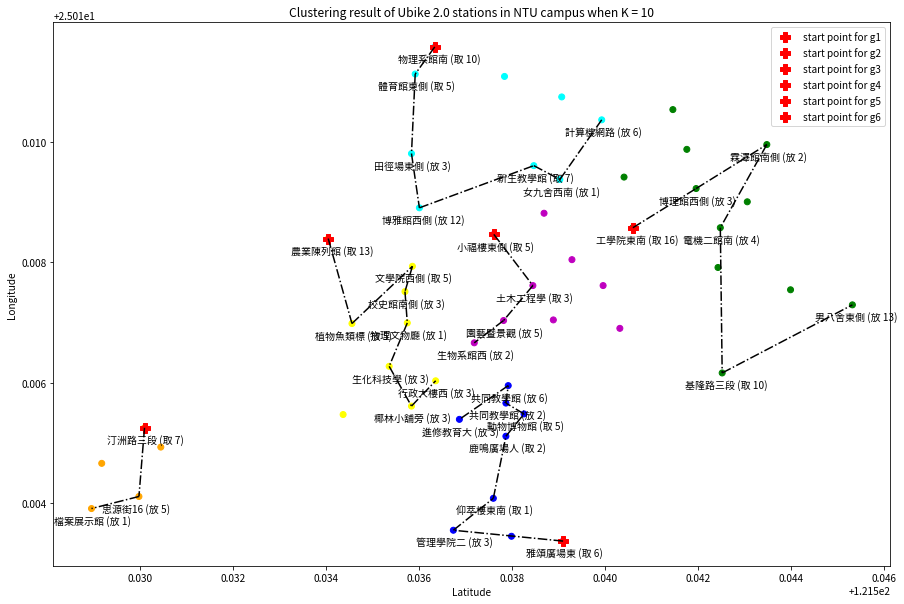

In [22]:
# In[] Plotting clustering result
LABEL_COLOR_MAP = {0:'orange', 1:'green', 2:'cyan', 3:'blue', 4:'m', 5:'yellow'}                 
label_color = [LABEL_COLOR_MAP[l] for l in cluster]

plt.rcParams["figure.figsize"] = (15,10)
plt.scatter([X_hat[:,0]], [X_hat[:,1]], c=label_color, cmap='viridis')
# plt.scatter([centroids[:,0]], [centroids[:,1]], s=30, c='r', marker='P', label='Centroid for cluster')
# labels
# plt.scatter([X_hat[:,0]], [X_hat[:,1]], c="blue", marker='P', label='Centroid for cluster')

# for i in range(len(Label)):
    # plt.annotate(Label[i], (X_hat[i,0]-0.0008, X_hat[i,1]-0.00025))
groups = 6

for i in range(groups):
    id_list = detail[i]["name_list"]
    a_list = detail[i]["r_a"]
    b_list = detail[i]["r_b"]
    # print(a_list)
    # print(b_list)
    for j in range(1,len(a_list)-1):
        id = id_list[j-1]
        if detail[i]["r_a"][j] > 0:
            plt.annotate("%s (取 %d)"%(Label[id], int(detail[i]["r_a"][j]+0.5)), (X_hat[id,0]-0.0008, X_hat[id,1]-0.00025))
        elif detail[i]["r_b"][j] > 0:
            plt.annotate("%s (放 %d)"%(Label[id], int(detail[i]["r_b"][j])+0.5), (X_hat[id,0]-0.0008, X_hat[id,1]-0.00025))
        # print(i,j)
        # print(y_list)

for i in range(groups):
    id_list = detail[i]["name_list"]
    y_list_1 = detail[i]["r_y"]
    items = len(y_list_1)
    for j in range(items):
        y_list = y_list_1[j]
        print(y_list)
        for k in range(items):
        # j = 0（從虛擬點出發）, y_jk = 1（從虛擬點到 k）, k 的 ID 是 id_list[k-1]
            if j == 0 and y_list[k] >=0.5: #  and k!= 0 and k != items-1
                # print((i,j,k))
                b_ID = id_list[k-1] 
                plt.scatter(X_hat[b_ID,0],X_hat[b_ID,1], s=100, c='r', marker='P', label='start point for g'+str(i+1))

            # # y_ab = 1（從虛擬點到 k ）, a_ID = id_list[j-1], b_ID = id_list[k-1]
            elif y_list[k] >= 0.5 and k!= items-1:
                    print((i,j,k))
                    a_ID = id_list[j-1]
                    b_ID = id_list[k-1]
                    xs = [X_hat[a_ID,0], X_hat[b_ID,0]]
                    ys = [X_hat[a_ID,1], X_hat[b_ID,1]]
                    plt.plot(xs, ys, c='black', linestyle = '-.')
                    # plt.scatter(xs, ys, c='r')
            elif y_list[k] == 1 and k == len(y_list)-1:
                continue



plt.title("Clustering result of Ubike 2.0 stations in NTU campus when K = %d"%(k))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Longitude")

## 看到這邊就好：畫圖在上面＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

In [ ]:
df_stat.to_csv("stat.csv", encoding='utf-8_sig')
df_result.to_csv("result.csv", encoding='utf-8_sig')

In [ ]:
# # In[] Plotting clustering result

# LABEL_COLOR_MAP = {0:'orange', 1:'green', 2:'cyan', 3:'blue', 4:'m', 5:'yellow'}                 
# label_color = [LABEL_COLOR_MAP[l] for l in cluster]

# plt.rcParams["figure.figsize"] = (15,10)
# plt.scatter([X_hat[:,0]], [X_hat[:,1]], c=label_color, cmap='viridis')
# plt.scatter([centroids[:,0]], [centroids[:,1]], s=30, c='r', marker='P', label='Centroid for cluster')
# # labels
# # plt.scatter([X_hat[:,0]], [X_hat[:,1]], c="blue", marker='P', label='Centroid for cluster')

# for i in range(len(Label)):
#     plt.annotate(Label[i], (X_hat[i,0]-0.0008, X_hat[i,1]-0.00025))
#     plt.annotate(detail[0][][i], (X_hat[i,0]-0.0008, X_hat[i,1]-0.00025))


# plt.title("Clustering result of Ubike 2.0 stations in NTU campus when K = %d"%(k))
# plt.legend()
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")

In [ ]:
df_result = pd.concat([df, pd.DataFrame(cluster, columns=["Cluster"])], axis=1)
empty_row = [[0 for i in range(4)] for j in range(k)]
df_stat = pd.DataFrame(empty_row, columns=["Cluster total space", "Cluster occupied space","Cluster vacant space","Cluster stations"])
for i in range(k):
    df_stat.at[i,"Cluster total space"] = df_result.loc[df_result["Cluster"] == i, 'space_total'].sum()
    df_stat.at[i,"Cluster occupied space"] = df_result.loc[df_result["Cluster"] == i, 'space_occupied'].sum()
    df_stat.at[i,"Cluster vacant space"] = df_result.loc[df_result["Cluster"] == i, 'space_vacant'].sum()
    df_stat.at[i,"Cluster stations"] =  df_result[df_result["Cluster"] == i].count()['space_vacant']

df_stat                                                 


,Cluster total space,Cluster occupied space,Cluster vacant space,Cluster stations
0,127,8,119,5
1,142,72,62,8
2,180,59,119,9
3,180,84,80,8
4,244,27,217,14
5,243,72,171,9
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


# Splitting Distance adjacency matrix

In [ ]:
df_dist = pd.read_excel("C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\OR\\OR_Final project\\distance_sites.xlsx")
df_dist = df_dist.iloc[:,1:]
"""以下程式碼為讀取已經分好群的結果，并非上面重新跑K-means的結果"""
#df_result = pd.read_csv("C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\OR\\OR_Final project\\result.csv")
#df_result = df_result.iloc[:,2:]
#cluster = df_result["Cluster"]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\OR\\OR_Final project\\distance_sites.xlsx'

In [ ]:
cluster_list = [[] for i in range(k)]
cluster_list_str = [[] for i in range(k)]

for i in range(k):
    for index, elem in enumerate(cluster):
        if elem == i:
            cluster_list[i].append(index)
            
cluster_list

[[0, 1, 2, 3, 4],
 [5, 13, 14, 16, 26, 29, 30, 38, 46, 47, 50, 51],
 [11, 15, 20, 28, 31, 33, 39, 45, 52],
 [6, 8, 21, 22, 23, 24, 36, 42, 43],
 [9, 12, 19, 34, 37, 40, 44, 48, 49],
 [7, 10, 17, 18, 25, 27, 32, 35, 41]]

In [ ]:
matrix_list = []
final_matrix = []

for i in range(k):
    matrix_list.append(pd.DataFrame(columns = cluster_list[i], index= cluster_list[i]))
    matrix_list[i] = matrix_list[i].merge(df_dist[cluster_list[i]], left_index=True, right_index=True, suffixes=('_x', ''))
    matrix_list[i].drop(matrix_list[i].filter(regex='_x$').columns.tolist(),axis=1, inplace=True)

matrix_list[1]

,5,13,14,16,26,29,30,38,46,47,50,51
5,0.000000,0.308852,0.496438,0.548032,0.136867,0.530160,0.459321,0.400848,0.296668,0.319606,0.349083,0.299253
13,0.308852,0.000000,0.330518,0.419286,0.213276,0.497522,0.419581,0.344904,0.320447,0.268010,0.432388,0.194803
14,0.496438,0.330518,0.000000,0.095346,0.360273,0.234538,0.185896,0.154928,0.252443,0.189432,0.328265,0.198462
16,0.548032,0.419286,0.095346,0.000000,0.416366,0.163411,0.145326,0.157602,0.270881,0.228535,0.315110,0.263150
26,0.136867,0.213276,0.360273,0.416366,0.000000,0.418958,0.342949,0.277013,0.187449,0.190440,0.272863,0.162484
29,0.530160,0.497522,0.234538,0.163411,0.418958,0.000000,0.079370,0.154132,0.234381,0.240960,0.213509,0.307289
30,0.459321,0.419581,0.185896,0.145326,0.342949,0.079370,0.000000,0.075034,0.162840,0.161737,0.173536,0.228159
38,0.400848,0.344904,0.154928,0.157602,0.277013,0.154132,0.075034,0.000000,0.113505,0.089271,0.173338,0.153171
46,0.296668,0.320447,0.252443,0.270881,0.187449,0.234381,0.162840,0.113505,0.000000,0.075509,0.113797,0.136820
47,0.319606,0.268010,0.189432,0.228535,0.190440,0.240960,0.161737,0.089271,0.075509,0.000000,0.183574,0.073561


In [ ]:
from pandas import ExcelWriter

writer = pd.ExcelWriter('C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\OR\\OR_Final project\\Clustered_dist_matrix.xlsx')
sheet_name = ["Cluster %d"%(i) for i in range(k)]
for i, j in zip(matrix_list, sheet_name):
    i.to_excel(writer, sheet_name=j)  
writer.save()